In [46]:
import numpy as np
import pandas as pd
import itertools

import matplotlib.pyplot as plt

# Training dataset

In [47]:
df = pd.read_csv('../../data/pp_4l_all.csv')
cols_cont = [
    'E1', 'p1x', 'p1y', 'p1z', 
    'E2', 'p2x', 'p2y', 'p2z',
    'E3', 'p3x', 'p3y', 'p3z',
    'E4', 'p4x', 'p4y', 'p4z', 
]
cols_cat = ['pdg1', 'pdg2', 'pdg3', 'pdg4']

df['schema'] = df[cols_cat].groupby(by=cols_cat).ngroup().values

In [48]:
df.head()

,pdg1,E1,p1x,p1y,p1z,pdg2,E2,p2x,p2y,p2z,...,E3,p3x,p3y,p3z,pdg4,E4,p4x,p4y,p4z,schema
0,11,20.274241,13.753708,1.397849,14.829915,-11,13.459523,-13.458053,-0.178631,0.087476,...,10.726935,1.457106,-9.715445,-4.306151,-13,19.941356,-1.752761,8.496227,17.955180,1
1,13,152.820099,63.584427,18.996694,-137.659427,-13,164.917905,4.471840,31.646155,-161.791309,...,137.529487,-39.586901,-44.338982,-124.021291,-13,39.559938,-28.469366,-6.303867,-26.734509,2
2,11,51.267102,27.995380,26.039697,34.154190,-11,43.013595,-7.827488,-17.337374,-38.578689,...,123.210062,0.378806,-41.833551,115.890116,-13,46.883635,-20.546697,33.131228,26.042638,1
3,13,64.805282,-3.653628,46.355274,45.139262,-13,38.158727,-29.094263,-15.298609,-19.379208,...,57.805237,34.629435,10.578369,45.059234,-13,42.993259,-1.881544,-41.635034,10.554281,2
4,13,25.501529,17.607195,-7.617831,-16.800957,-13,22.270427,3.366801,16.786119,-14.242599,...,36.269401,-21.935459,13.187325,-25.698023,-13,47.012227,0.961463,-22.355613,-41.345380,2


In [49]:
df.columns

Index(['pdg1', 'E1', 'p1x', 'p1y', 'p1z', 'pdg2', 'E2', 'p2x', 'p2y', 'p2z',
       'pdg3', 'E3', 'p3x', 'p3y', 'p3z', 'pdg4', 'E4', 'p4x', 'p4y', 'p4z',
       'schema'],
      dtype='object')

In [50]:
schemas = [['E1', 'p1x', 'p1y', 'p1z'], 
           ['E2', 'p2x', 'p2y', 'p2z'],
           ['E3', 'p3x', 'p3y', 'p3z'], 
           ['E4', 'p4x', 'p4y', 'p4z']]
schemas

[['E1', 'p1x', 'p1y', 'p1z'],
 ['E2', 'p2x', 'p2y', 'p2z'],
 ['E3', 'p3x', 'p3y', 'p3z'],
 ['E4', 'p4x', 'p4y', 'p4z']]

In [51]:
data = None
for c in itertools.permutations(schemas):
    d = df[np.array(c).flatten().tolist()]
    data = d if data is None else pd.concat([data, d], axis=0)
data.shape

(480000, 16)

In [52]:
e_sum_sq = np.power(data['E1'] + data['E2'] + data['E3'] + data['E4'], 2)
x_sum_sq = np.power(data['p1x'] + data['p2x'] + data['p3x'] + data['p4x'], 2)
y_sum_sq = np.power(data['p1y'] + data['p2y'] + data['p3y'] + data['p4y'], 2)
z_sum_sq = np.power(data['p1z'] + data['p2z'] + data['p3z'] + data['p4z'], 2)
m_values = np.sqrt(e_sum_sq - x_sum_sq - y_sum_sq - z_sum_sq)

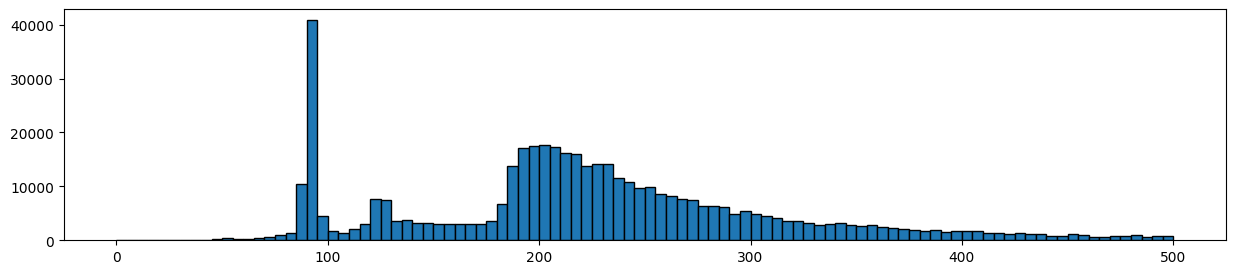

In [53]:
plt.figure(figsize=(15, 3))
plt.hist(m_values, bins=100, range=(0, 500), edgecolor='black')
plt.show()

In [54]:
data.to_csv('four_guys.csv', header=None, sep=" ", index=None)

# Generated dataset

In [55]:
gf = pd.read_csv('four_guys.csv.gen_events.csv', sep=" ", header=None, names=np.array(schemas).flatten().tolist())

In [56]:
gf.head()

,E1,p1x,p1y,p1z,E2,p2x,p2y,p2z,E3,p3x,p3y,p3z,E4,p4x,p4y,p4z
0,1646.083496,16.001719,-32.381172,-1588.486938,965.608337,53.032875,41.083233,1016.196228,365.738831,-86.228249,31.142544,-400.179779,985.390869,33.388638,-43.992027,907.568115
1,998.197998,138.652679,-12.622431,-971.455994,344.792603,19.421833,56.910378,367.822815,49.421974,-58.048042,-8.505896,18.707535,779.232300,-94.448967,-39.771851,753.919556
2,1253.297485,101.288696,29.363863,-1253.500122,668.234680,29.941748,0.430858,730.731140,44.367031,-12.339139,-13.673242,-89.192924,1094.595947,-101.811829,-16.116264,1048.305542
3,1115.051758,154.821335,18.168207,-1140.675415,661.643982,-10.089915,22.724264,719.960815,472.348999,12.801989,-10.615056,-527.287476,1297.845093,-139.689926,-19.355021,1272.528931
4,1457.781128,-25.224949,60.214291,-1412.628784,751.257751,3.986500,-6.031649,816.732727,331.425110,-99.597321,-86.922478,270.246002,924.929199,130.859131,28.318880,825.961060


In [57]:
e_sum_sq_g = np.power(gf['E1'] + gf['E2'] + gf['E3'] + gf['E4'], 2)
x_sum_sq_g = np.power(gf['p1x'] + gf['p2x'] + gf['p3x'] + gf['p4x'], 2)
y_sum_sq_g = np.power(gf['p1y'] + gf['p2y'] + gf['p3y'] + gf['p4y'], 2)
z_sum_sq_g = np.power(gf['p1z'] + gf['p2z'] + gf['p3z'] + gf['p4z'], 2)
m_values_g = np.sqrt(e_sum_sq_g - x_sum_sq_g - y_sum_sq_g - z_sum_sq_g)

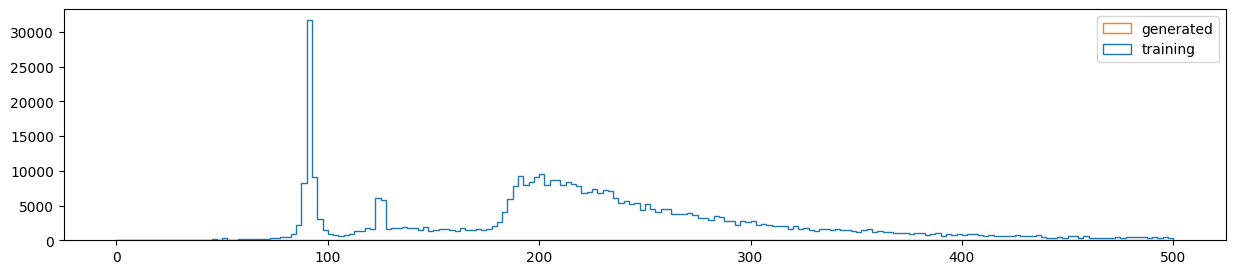

In [58]:
plt.figure(figsize=(15, 3))
plt.hist([m_values, m_values_g], bins=200, range=(0, 500), histtype='step', label=['training','generated'])
plt.legend()
plt.show()

# Training info

In [59]:
vae_log = pd.read_csv('../vae/four_guys.csv.log')
vae_log.head()

,epoch,loss,mse,val_loss,val_mse
0,0,0.009341,0.009281,0.000532,0.000449
1,1,0.000554,0.000470,0.001079,0.000993
2,2,0.000424,0.000339,0.000203,0.000117
3,3,0.000375,0.000291,0.000179,0.000094
4,4,0.000263,0.000177,0.000196,0.000110


In [60]:
aae_log = pd.read_csv('four_guys.csv.vae.log')
aae_log.head()

,epoch,loss,mse,val_loss,val_mse
0,0,0.010800,0.010744,0.000384,0.000304
1,1,0.000533,0.000451,0.000704,0.000620
2,2,0.000404,0.000321,0.000259,0.000175
3,3,0.000314,0.000231,0.000170,0.000086
4,4,0.000254,0.000170,0.000312,0.000228


In [61]:
disc_log = pd.read_csv('four_guys.csv.disc.log')
disc_log.head()

,epoch,loss,val_loss
0,0,0.711789,0.697958
1,1,0.696005,0.694300
2,2,0.693341,0.692435
3,3,0.691618,0.690970
4,4,0.690096,0.689507


In [62]:
edis_log = pd.read_csv('four_guys.csv.edis.log')
edis_log.head()

,epoch,loss,val_loss
0,0,0.091676,0.000954
1,1,0.000361,0.000148
2,2,0.000094,0.000060
3,3,0.000043,0.000032
4,4,0.000025,0.000019


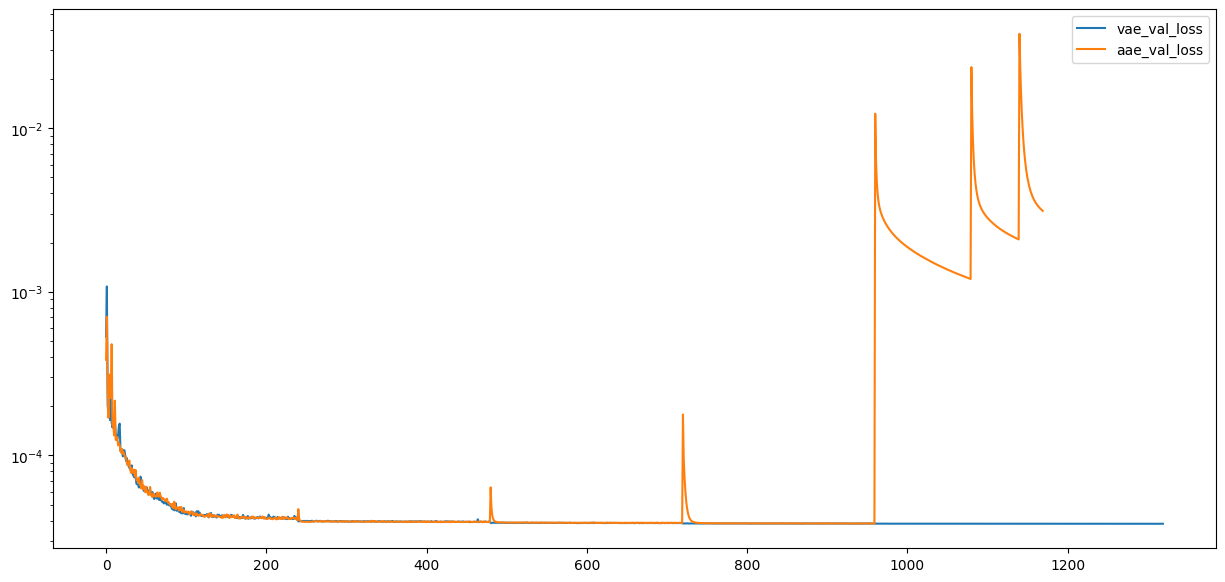

In [63]:
plt.figure(figsize=(15, 7))
plt.plot(vae_log.index, vae_log.val_loss, label='vae_val_loss')
#plt.plot(vae_log.index, vae_log.val_mse, label='vae_val_mse')
# plt.plot(log.index, log.loss, label='loss')
# plt.plot(log.index, log.mse, label='mse')

plt.plot(aae_log.index, aae_log.val_loss, label='aae_val_loss')

#plt.xlim((200, 400))
plt.yscale('log')
plt.legend()
plt.show()

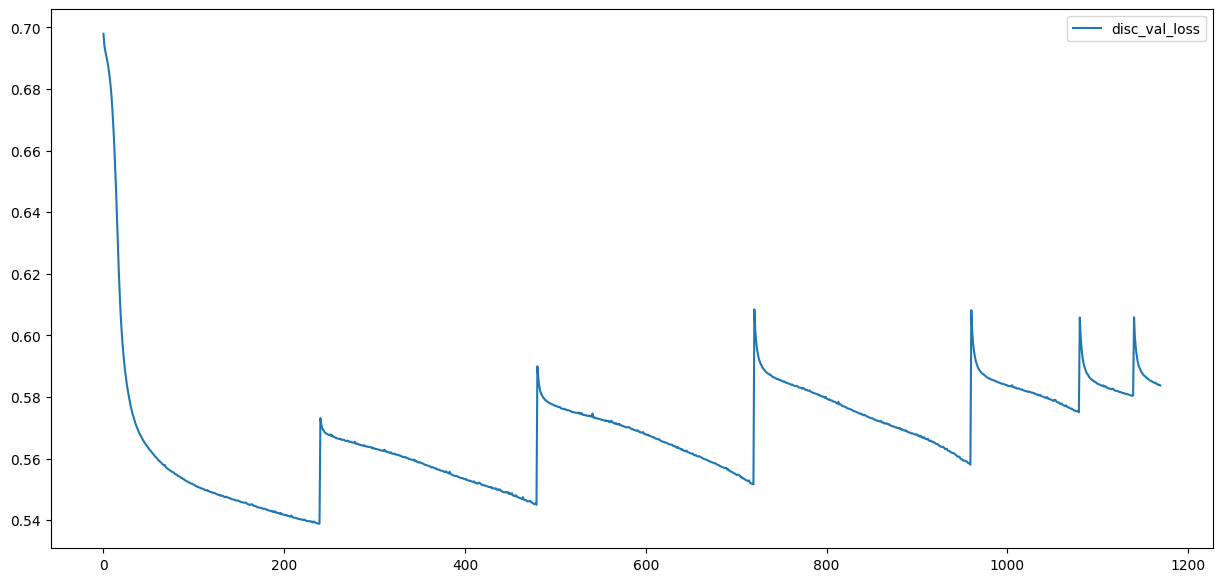

In [64]:
plt.figure(figsize=(15, 7))
#plt.plot(vae_log.index, vae_log.val_loss, label='vae_val_loss')
#plt.plot(vae_log.index, vae_log.val_mse, label='vae_val_mse')
# plt.plot(log.index, log.loss, label='loss')
# plt.plot(log.index, log.mse, label='mse')

# plt.plot(edis_log.index, edis_log.val_loss, label='edis_val_loss')
plt.plot(disc_log.index, disc_log.val_loss, label='disc_val_loss')


#plt.xlim((200, 400))
#plt.yscale('log')
plt.legend()
plt.show()

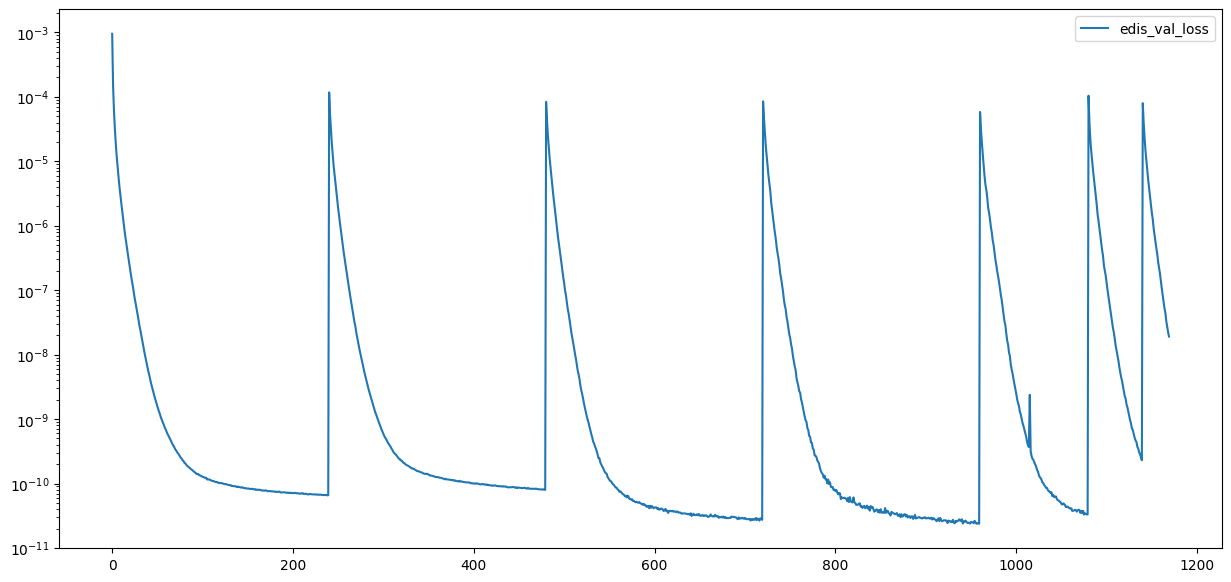

In [65]:
plt.figure(figsize=(15, 7))
#plt.plot(vae_log.index, vae_log.val_loss, label='vae_val_loss')
#plt.plot(vae_log.index, vae_log.val_mse, label='vae_val_mse')
# plt.plot(log.index, log.loss, label='loss')
# plt.plot(log.index, log.mse, label='mse')

plt.plot(edis_log.index, edis_log.val_loss, label='edis_val_loss')
# plt.plot(disc_log.index, disc_log.val_loss, label='disc_val_loss')


#plt.xlim((200, 400))
plt.yscale('log')
plt.legend()
plt.show()